<img src="https://www.insidehighered.com/sites/default/server_files/media/california_0.jpg" width=400>  


The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory

Acknowledgements:
This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

CA_url="https://raw.githubusercontent.com/csbfx/advpy122-data/master/California_housing.csv"
ca = pd.read_csv(CA_url)

# Renames headers for all of the columns.
ca = ca.rename(columns={"longitude":"Longitude", 
                      "latitude":"Latitude", 
                      "housing_median_age":"Housing Median Age",
                      "total_rooms":"Total Rooms",
                      "total_bedrooms":"Total Bedrooms",
                      "population":"Population",
                      "households":"Households",
                      "median_income":"Median Income",
                      "median_house_value":"Median House Value",
                      "ocean_proximity":"Ocean Proximity"})
ca.head()

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Median Income,Median House Value,Ocean Proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Q1: show the number of missing data in each column of the dataframe

In [2]:
# Shows the number of missing data in each column of the dataframe.
ca.isnull().sum()

Longitude               0
Latitude                0
Housing Median Age      0
Total Rooms             0
Total Bedrooms        207
Population              0
Households              0
Median Income           0
Median House Value      0
Ocean Proximity         0
dtype: int64

### Q2: show the data type for each column of the dataframe

In [3]:
# Shows the data type for each column of the dataframe.
ca.dtypes

Longitude             float64
Latitude              float64
Housing Median Age    float64
Total Rooms           float64
Total Bedrooms        float64
Population            float64
Households            float64
Median Income         float64
Median House Value    float64
Ocean Proximity        object
dtype: object

### Q3: Plot a regression line and confidence interval 
Create a lmplot that shows the linear regression between `median_income` and `median_house_value`. Only use data with `median_housing_value` < 500000. Include a meaningful title for the plot.

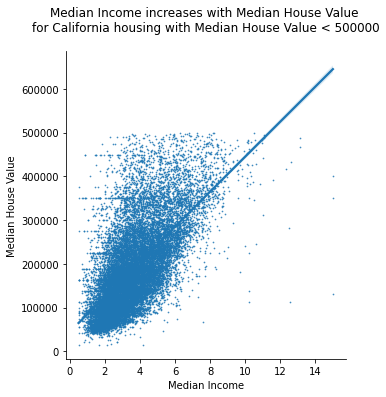

In [4]:
# Removes missing data.
ca = ca.dropna()

# Creates a lmplot that shows the linear regression between median income and median house value.
sns.lmplot(
    data=ca[ca['Median House Value'] < 500000],
    x="Median Income",
    y="Median House Value",
    markers='.',
    scatter_kws={'s':2})
plt.title("Median Income increases with Median House Value \nfor California housing with Median House Value < 500000", pad=20);

### Q4: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

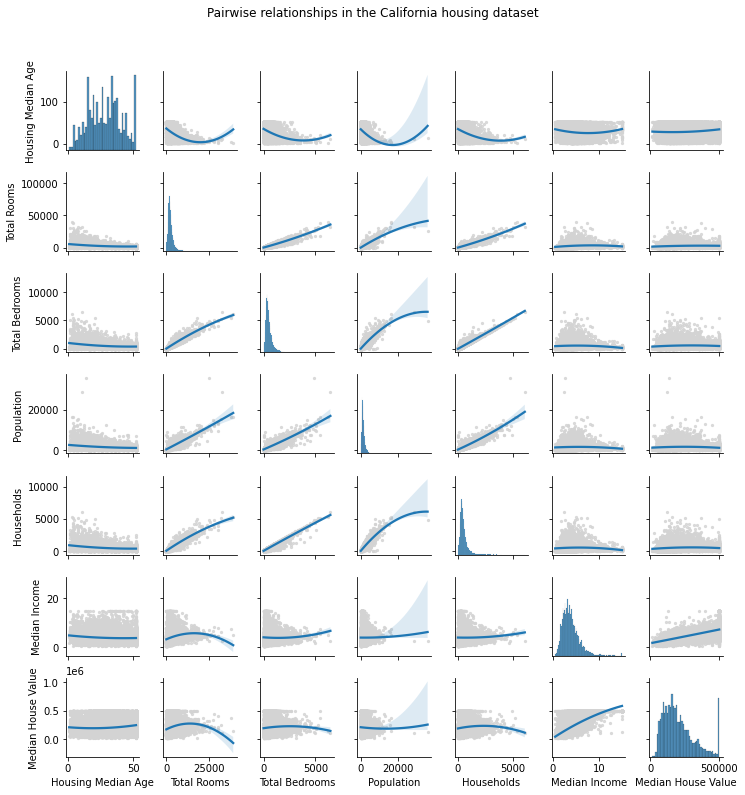

In [5]:
# Creates a pair plot to show pairwise relationships in the dataset.
g = sns.pairplot(
    data=ca.drop(["Longitude", "Latitude", "Ocean Proximity"], axis=1),
    kind="reg",
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}, "order":2},
    height=1.5);
g.fig.suptitle("Pairwise relationships in the California housing dataset", y=1.05);

### Q5. Create a relplot that shows the `median_income` and `median_house` along with the `longitude` and `latitude`. 
Plot `longitude` along the x-axis and `latitude` along the y-axis. Use `hue` to display the `median_house_value` and the size of the data point `median_income`. Include a meaningful title to the plot. 

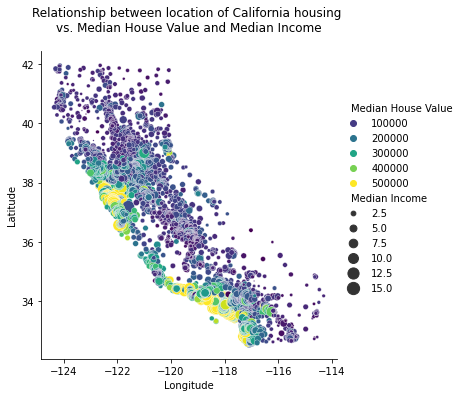

In [7]:
# Creates a relplot showing the median income and median house value along with the longitude and latitude.
sns.relplot(
    data=ca,
    x="Longitude",
    y="Latitude",
    size="Median Income",
    sizes=(2,150),
    hue="Median House Value",
    palette="viridis")
plt.title("Relationship between location of California housing \nvs. Median House Value and Median Income", pad=20);

### Q6: Create a plot with small multiples plots
The small multiple plots should show the relationship between `median_house_value` vs `median_income` using `ocean_proximity` as the single category. Only use data with `median_house_value` < 500000. Organize the multiple plots to have 2 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

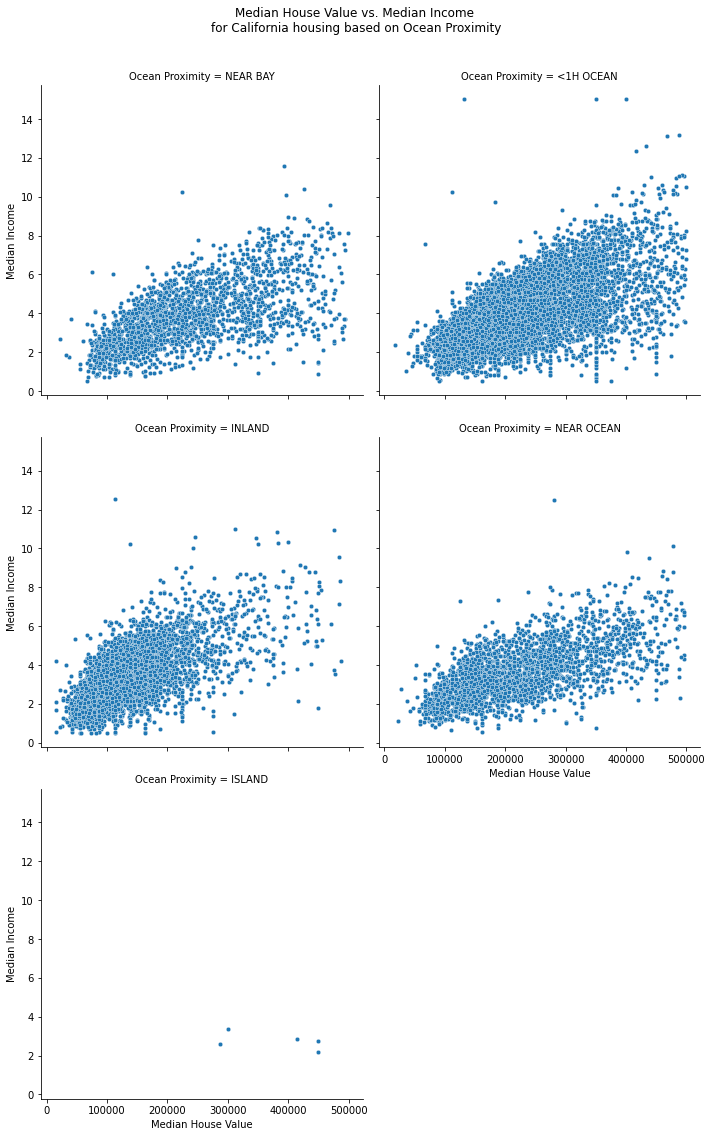

In [8]:
# Creates a plot with small multiple plots showing the relationship between median house value vs. median income using ocean proximity as the single category.
g = sns.relplot(
    data=ca[ca["Median House Value"] < 500000],
    x="Median House Value",
    y="Median Income",
    col="Ocean Proximity",
    col_wrap=2,
    height=5,
    s=20)
g.fig.suptitle("Median House Value vs. Median Income \nfor California housing based on Ocean Proximity", y=1.05);